In [6]:
# Computing the hydrogen coordinates for the XYZ files:
function MakeXYZ(n,r)
    
    theta = [(2*pi*k/n) for k=0:n-1]
    
    x = round.(cos.(theta) .* r, digits=6)
    y = round.(sin.(theta) .* r, digits=6)
    
    touch("../configs/xyz_files/h$(n)_rings/$(r).xyz")
    
    file = open("../configs/xyz_files/h$(n)_rings/$(r).xyz", "w")
    
    write(file, "$(n)\n\n")
    
    for t=1:length(theta)
        
        line = "H $(x[t]) $(y[t]) 0.0\n"
        write(file, line)
        
    end

    close(file)
    
end

MakeXYZ (generic function with 1 method)

In [7]:
for r in collect(3:25) ./10
    MakeXYZ(6,r)
end

In [8]:
# Import modules and subroutines:

include("../subroutines/Subroutines.jl");

3.10.9


In [9]:
# Generate some chemical data:

py"""

config = configparser.ConfigParser()
config.read(wd+'/../configs/pyscf_configs/h6_rings_sto3g.ini')
RunPySCF.RunPySCF(config, nosec=True)

"""

True
converged SCF energy = 3.26673180601829
converged SCF energy = 3.26673180601829
True
converged SCF energy = -0.110235433994671
converged SCF energy = -0.110235433994665
True
converged SCF energy = -1.69527542416884
converged SCF energy = -1.69527542416884
True
converged SCF energy = -2.48511098297559
converged SCF energy = -2.48511098297559
True
converged SCF energy = -2.8839374024264
converged SCF energy = -2.88393740242641
True
converged SCF energy = -3.07524787563885
converged SCF energy = -3.07524787563885
True
converged SCF energy = -3.15023976727089
converged SCF energy = -3.15023976727089
True
converged SCF energy = -3.15704750674616
converged SCF energy = -3.15704750674616
True
converged SCF energy = -3.1225082724886
converged SCF energy = -3.1225082724886
True
converged SCF energy = -3.06270499619874
converged SCF energy = -3.06270499619874
True
converged SCF energy = -2.98794560542254
converged SCF energy = -2.98794560542254
True
converged SCF energy = -2.90508730631655


In [10]:
# Load the chemical data into julia as an array of chemical data structs:
# (one struct obtained for each molecular geometry as set up in the config file)

bond_lengths = collect(3:25) ./10;

md_fname = "h6_ring_sto3g_013124%1703.hdf5"

chemical_data_list = ReadIn("../datasets/pyscf_data/"*md_fname)

PrintChemData(chemical_data_list[10])

Molecule name: h6_ring
Basis set: sto3g
Molecular geometry: ../configs/xyz_files/h6_rings/1.2.xyz
RHF energy: -3.062704996198744
FCI energy: -3.174998162799432


In [11]:
e_rhf_vec = [chemical_data_list[m].e_rhf for m=1:length(chemical_data_list)]
e_fci_vec = [chemical_data_list[m].e_fci for m=1:length(chemical_data_list)]

23-element Vector{Float64}:
  3.241170654228778
 -0.14155525061514318
 -1.7329294864209732
 -2.529471955429317
 -2.935541934614619
 -3.1349369109588903
 -3.2193184407757194
 -3.2374767413247927
 -3.217049134813548
 -3.174998162799432
 -3.122533786665853
 -3.0673457937635105
 -3.0146484113008034
 -2.9676906653887123
 -2.928060055681848
 -2.8960150501422026
 -2.8709373832777216
 -2.8517859140717174
 -2.8374269286947347
 -2.826811321942385
 -2.8190476390894363
 -2.8134164721149886
 -2.809358177733014

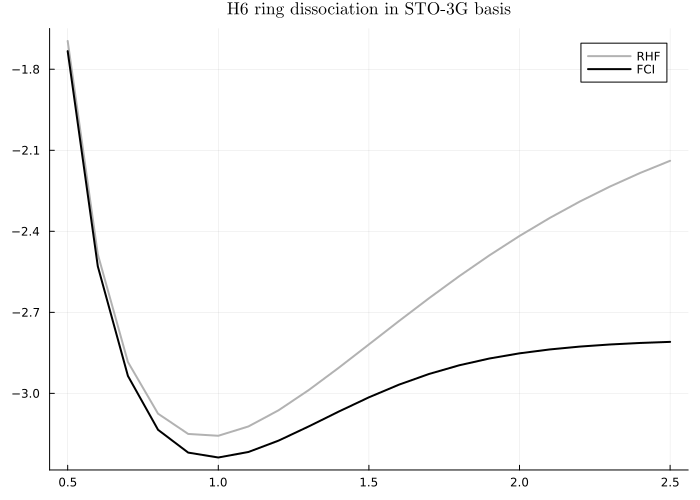

In [14]:
plot(
    bond_lengths[3:end], 
    e_rhf_vec[3:end], 
    color=RGB(0.7,0.7,0.7), 
    linewidth=2.0,
    label="RHF",
    title="H6 ring dissociation in STO-3G basis",
    titlefontsize=11.0,
    titlefont=font(14,"Computer Modern"),
    #xguide=L"r\quad(\AA)",
    #yguide=L"E\quad(\textrm{Ha.})",
    size=(700,500)
)

plot!(
    bond_lengths[3:end], 
    e_fci_vec[3:end], 
    color=RGB(0.0,0.0,0.0), 
    linewidth=2.0,
    label="FCI"
)